In [2]:
import pandas as pd
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [3]:
df_upward = pd.read_csv('../data/processed/EW_time_table_processed_.csv')
df_downward = pd.read_csv('../data/processed/EW_time_table_processed_downward.csv')

In [4]:
print("df_upward", df_upward.columns)
print("df_downward", df_downward.columns)

df_upward Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object')
df_downward Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object')


In [5]:
# Convert string to timedelta
df_upward['Dwell Time'] = pd.to_timedelta(df_upward['Dwell Time'])
df_downward['Dwell Time'] = pd.to_timedelta(df_downward['Dwell Time'])


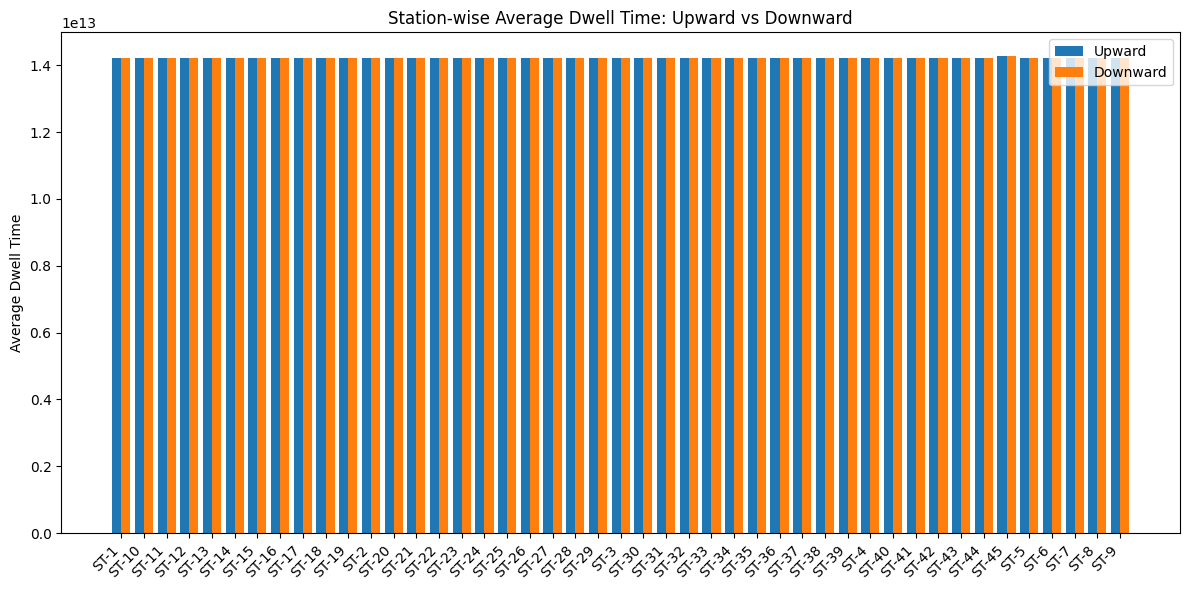

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group and calculate average dwell time
upward_avg = df_upward.groupby('Stations')['Dwell Time'].mean().reset_index().rename(columns={'Dwell Time': 'Upward'})
downward_avg = df_downward.groupby('Stations')['Dwell Time'].mean().reset_index().rename(columns={'Dwell Time': 'Downward'})

# Step 2: Merge on station
dwell_comparison = pd.merge(upward_avg, downward_avg, on='Stations', how='outer').fillna(0)

# Step 3: Plot
plt.figure(figsize=(12, 6))
x = range(len(dwell_comparison['Stations']))
plt.bar([i - 0.2 for i in x], dwell_comparison['Upward'], width=0.4, label='Upward')
plt.bar([i + 0.2 for i in x], dwell_comparison['Downward'], width=0.4, label='Downward')

plt.xticks(x, dwell_comparison['Stations'], rotation=45, ha='right')
plt.ylabel('Average Dwell Time')
plt.title('Station-wise Average Dwell Time: Upward vs Downward')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats
df_upward['Arrival'] = pd.to_datetime(df_upward['Arrival'], errors='coerce')
df_downward['Arrival'] = pd.to_datetime(df_downward['Arrival'], errors='coerce')

station_stats_up = compute_station_gap_stats(df_upward)
station_stats_down = compute_station_gap_stats(df_downward)

print("Station stats upward:", station_stats_up)


Computed station gap stats:
   Stations   Avg_Gap  Min_Gap  Max_Gap   Gap_Std
39    ST-45  7.093831      0.0     15.0  7.496685
18    ST-26  7.504608      0.0     15.0  7.556665
38    ST-44  7.504608      0.0     15.0  7.556665
16    ST-24  7.505952      0.0     15.0  7.555368
36    ST-42  7.505952      0.0     15.0  7.555368
31    ST-38  7.507296      0.0     15.0  7.554084
1     ST-10  7.507296      0.0     15.0  7.554084
3     ST-12  7.507296      0.0     15.0  7.554084
34    ST-40  7.507296      0.0     15.0  7.554084
43     ST-8  7.507296      0.0     15.0  7.554084
41     ST-6  7.507296      0.0     15.0  7.554084
33     ST-4  7.507296      0.0     15.0  7.554084
5     ST-14  7.507296      0.0     15.0  7.554084
23    ST-30  7.508641      0.0     15.0  7.552816
9     ST-18  7.508641      0.0     15.0  7.552816
20    ST-28  7.508641      0.0     15.0  7.552816
12    ST-20  7.508641      0.0     15.0  7.552816
25    ST-32  7.508641      0.0     15.0  7.552816
29    ST-36  7.508641 

In [8]:
print("Station stats downward:", station_stats_down)


Station stats downward:    Stations   Avg_Gap  Min_Gap  Max_Gap   Gap_Std
39    ST-45  7.093831      0.0     15.0  7.496685
18    ST-26  7.504608      0.0     15.0  7.556665
38    ST-44  7.504608      0.0     15.0  7.556665
16    ST-24  7.505952      0.0     15.0  7.555368
36    ST-42  7.505952      0.0     15.0  7.555368
31    ST-38  7.507296      0.0     15.0  7.554084
1     ST-10  7.507296      0.0     15.0  7.554084
3     ST-12  7.507296      0.0     15.0  7.554084
34    ST-40  7.507296      0.0     15.0  7.554084
43     ST-8  7.507296      0.0     15.0  7.554084
41     ST-6  7.507296      0.0     15.0  7.554084
33     ST-4  7.507296      0.0     15.0  7.554084
5     ST-14  7.507296      0.0     15.0  7.554084
23    ST-30  7.508641      0.0     15.0  7.552816
9     ST-18  7.508641      0.0     15.0  7.552816
20    ST-28  7.508641      0.0     15.0  7.552816
12    ST-20  7.508641      0.0     15.0  7.552816
25    ST-32  7.508641      0.0     15.0  7.552816
29    ST-36  7.508641     

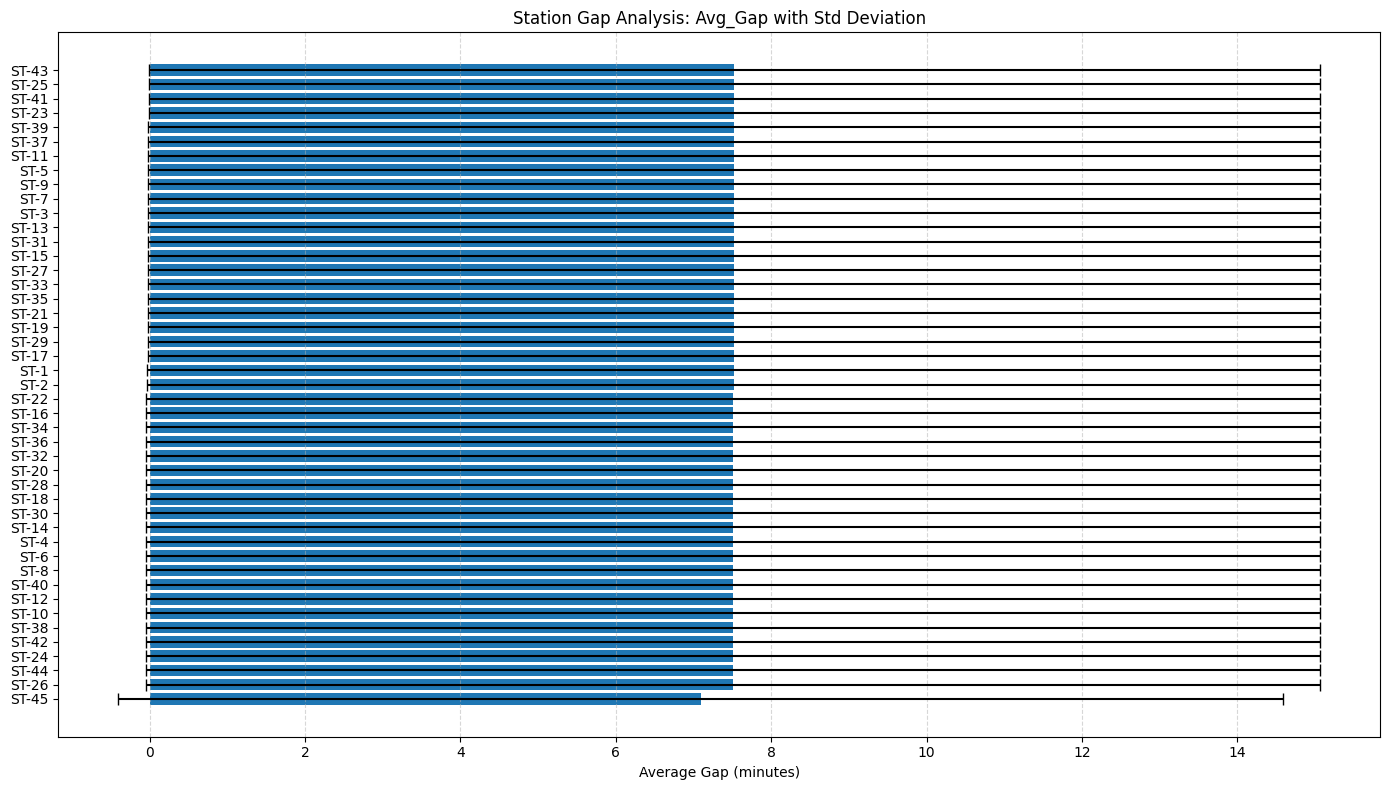

In [11]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

# Sort by Avg_Gap for better visualization
df_sorted = station_stats_down.sort_values("Avg_Gap")

plot_utils.plot_dwell_time_distribution(df_sorted)


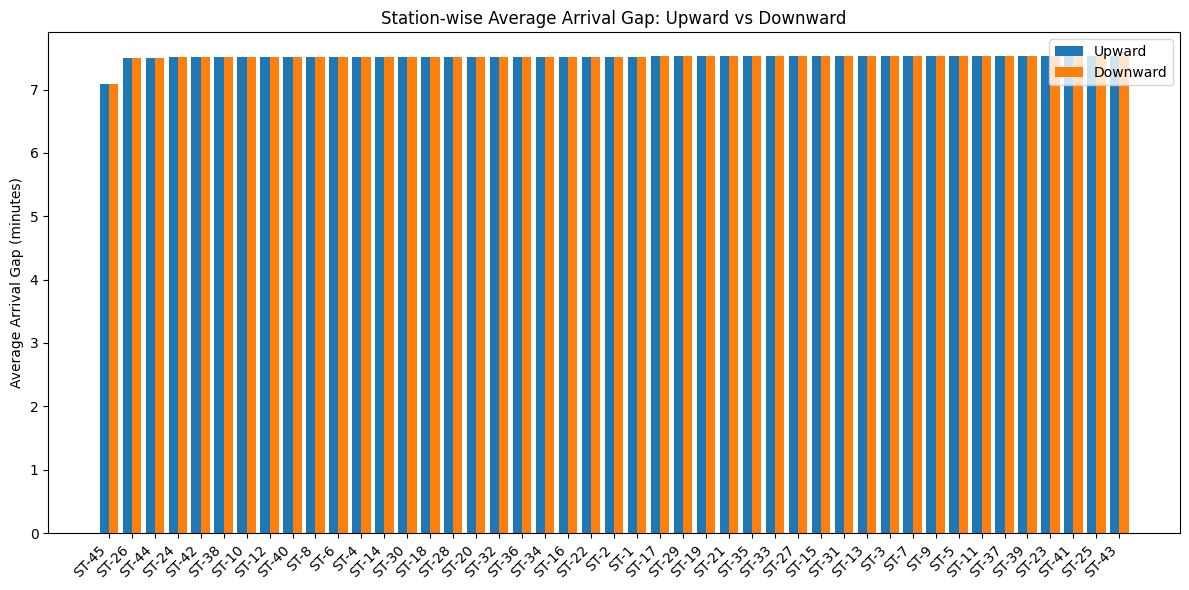

In [9]:
import matplotlib.pyplot as plt

# Merge on Stations
gap_comparison = station_stats_up.merge(
    station_stats_down,
    on='Stations',
    suffixes=('_Upward', '_Downward'),
    how='inner'
)

# Plot
plt.figure(figsize=(12, 6))
x = range(len(gap_comparison))
plt.bar([i - 0.2 for i in x], gap_comparison['Avg_Gap_Upward'], width=0.4, label='Upward')
plt.bar([i + 0.2 for i in x], gap_comparison['Avg_Gap_Downward'], width=0.4, label='Downward')

plt.xticks(x, gap_comparison['Stations'], rotation=45, ha='right')
plt.ylabel('Average Arrival Gap (minutes)')
plt.title('Station-wise Average Arrival Gap: Upward vs Downward')
plt.legend()
plt.tight_layout()
plt.show()
